In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from collections import Counter

import datetime as dt

import talib


In [18]:
df = pd.read_csv("C:\\Users\\tcgra\\Documents\\LJMU_Code\Datasets\\reliance_stock.csv")
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3698 entries, 0 to 3697
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3698 non-null   object 
 1   Open       3698 non-null   float64
 2   High       3698 non-null   float64
 3   Low        3698 non-null   float64
 4   Close      3698 non-null   float64
 5   Adj Close  3698 non-null   float64
 6   Volume     3698 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 202.4+ KB


In [19]:
df = df[['Open', 'High', 'Low', 'Close']]

In [20]:
# A variable for predicting 'n' days out into the future
forecast_out = 100 #'n=30' days
#Create another column (the target ) shifted 'n' units up
df['Prediction'] = df[['Close']].shift(-forecast_out)
df = df.dropna()
#print the new data set
print(df.tail())

             Open         High          Low        Close   Prediction
3593  1110.000000  1123.000000  1104.199951  1115.150024  1089.150024
3594  1110.099976  1121.500000  1107.800049  1110.650024  1098.349976
3595  1119.500000  1137.400024  1112.150024  1129.849976  1120.199951
3596  1130.000000  1157.300049  1128.000000  1151.400024  1125.550049
3597  1151.000000  1190.400024  1147.150024  1186.000000  1121.250000


In [21]:
## Create the independent data set (X) to train model.
#  Create a variable called ‘X’ 
#  Cnvert the dataframe into a numpy array after dropping the ‘Prediction’ column
#  Store this new data into ‘X’.

X = np.array(df.drop(['Prediction'],1))

#Remove the last '30' rows
X = X[:-forecast_out]
print(X)

[[ 90.59179688  90.59179688  88.58470154  89.13140106]
 [ 89.73280334  91.98190308  89.13140106  91.40399933]
 [ 91.37280273  92.13809967  89.34230042  90.59960175]
 ...
 [929.         936.20001221 905.09997559 910.84997559]
 [909.25       909.25       888.04998779 889.75      ]
 [897.65002441 914.5        893.29998779 911.45001221]]


In [22]:
### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array and from the ‘Prediction’ column
y = np.array(df['Prediction'])
# Get all of the y values except the last '30' rows
y = y[:-forecast_out]
print(y)

[  67.58460236   67.13169861   67.81890106 ... 1129.84997559 1151.40002441
 1186.        ]


Feature scaling

In [23]:
scaled = StandardScaler()
scaled.fit(X)
X = scaled.transform(X)

Train Test Split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Support Vector Machine Regression

Performing Grid Search for finding best parameters for SVM Regression

In [25]:
#  parameters = {'kernel':('sigmoid',''), 'C':[100,1000,10000,50000,100000],'degree':[1,2],'epsilon':[0.1,1,2,4,5],'tol': [0.1,0.5]}
#  sv = SVR(gamma = 'auto')
#  grid_search = GridSearchCV(sv, parameters, verbose = 3 ,cv = 3)

#  grid_search.fit(X_train,y_train)

#  grid_search.best_estimator_

#SVR(C=50000, cache_size=200, coef0=0.0, degree=1, epsilon=2, gamma='auto',kernel='rbf', max_iter=-1, shrinking=True, tol=0.1, verbose=False)

# SVR(C=100, cache_size=200, coef0=0.0, degree=1, epsilon=5, gamma='auto',
#     kernel='sigmoid', max_iter=-1, shrinking=True, tol=0.1, verbose=False)

## Testing

In [26]:
svr_poly = SVR(C=50000, cache_size=200, coef0=0.0, degree=1, epsilon=2, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.1, verbose=False)

In [27]:
svr_poly.fit(X_train, y_train)

SVR(C=50000, cache_size=200, coef0=0.0, degree=1, epsilon=2, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.1, verbose=False)

In [28]:
svm_poly_predict = svr_poly.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(svm_poly_predict,y_test)
rmse = mean_squared_error(svm_poly_predict,y_test, squared= False)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(svm_poly_predict,y_test)

print('The mae is {} , rmse is {} and mape is {}.'.format(mae,rmse, mape))


The mae is 48.2049438720588 , rmse is 75.50361215343999 and mape is 11.312017332685823.


In [30]:
# confidence = svr_poly.score(X_test, y_test)
# print('accuracy:',confidence)

In [31]:
from sklearn.metrics import r2_score
accuracy = r2_score(svm_poly_predict, y_test)
print("r2-score:", accuracy)


r2-score: 0.8457769557081449


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
accuracy = mean_absolute_error(svm_poly_predict, y_test)
print("mae score:", accuracy)

mae score: 48.2049438720588


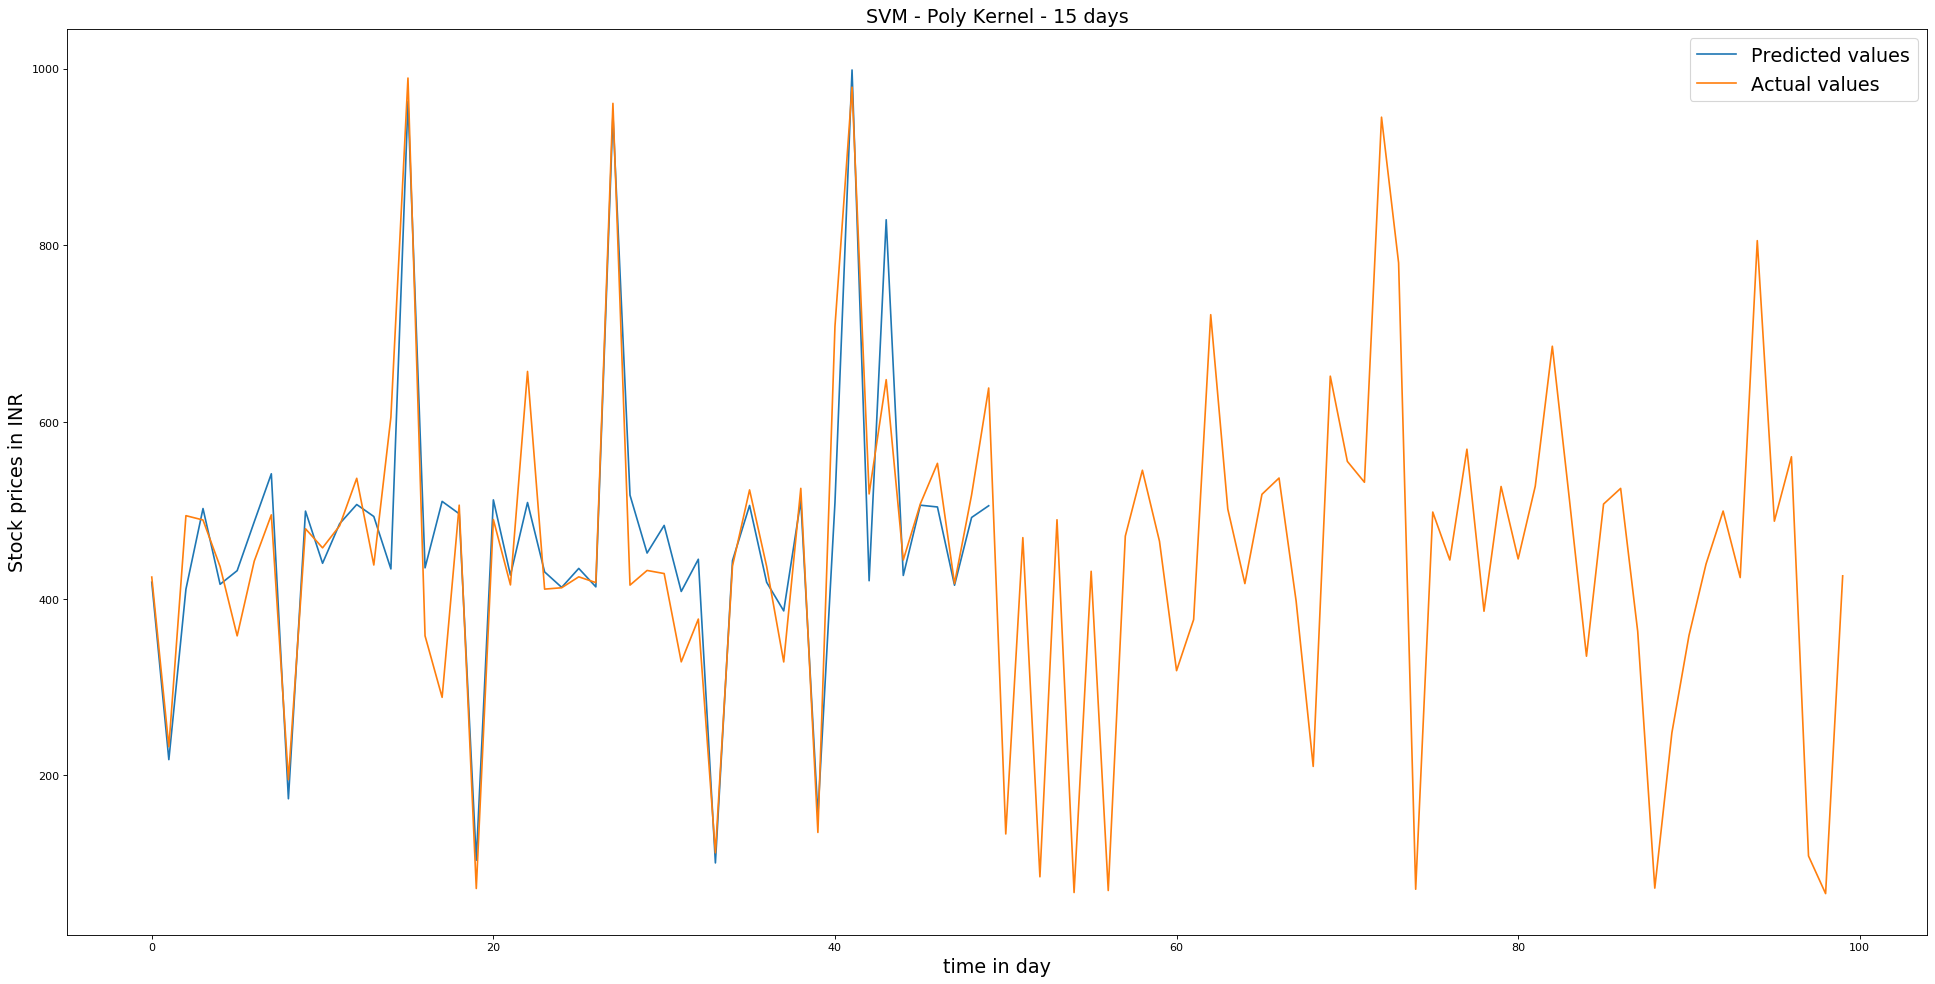

In [34]:
fig=plt.figure(figsize=(30, 15), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(svm_poly_predict[0:50],label = "Predicted values")
plt.plot(y_test[0:100], label = "Actual values")
plt.xlabel('time in day', fontsize = 'xx-large')
plt.ylabel('Stock prices in INR', fontsize = 'xx-large')
plt.title('SVM - Poly Kernel - 15 days', fontsize = 'xx-large')
plt.legend(fontsize = 'xx-large')
plt.show()

In [134]:
svr_rbf = SVR(C=30000, cache_size=200, coef0=0.0, degree=1, epsilon=5, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.1, verbose=False)

svr_rbf.fit(X_train, y_train)

svm_rbf_predict = svr_rbf.predict(X_test)

In [135]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 

mae = mean_absolute_error(svm_rbf_predict,y_test)
rmse = mean_squared_error(svm_rbf_predict,y_test, squared= False)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(svm_rbf_predict,y_test)

print('The mae is {} , rmse is {} and mape is {}.'.format(mae,rmse, mape))

The mae is 30.286411575587582 , rmse is 45.10474688160402 and mape is 7.436884935770648.


In [136]:
confidence = svr_rbf.score(X_test, y_test)
print('accuracy:',confidence)

accuracy: 0.9207564016316406


In [137]:
from sklearn.metrics import r2_score
accuracy = r2_score(svm_rbf_predict, y_test)
print("r2-score:", accuracy)

r2-score: 0.9157287663467519


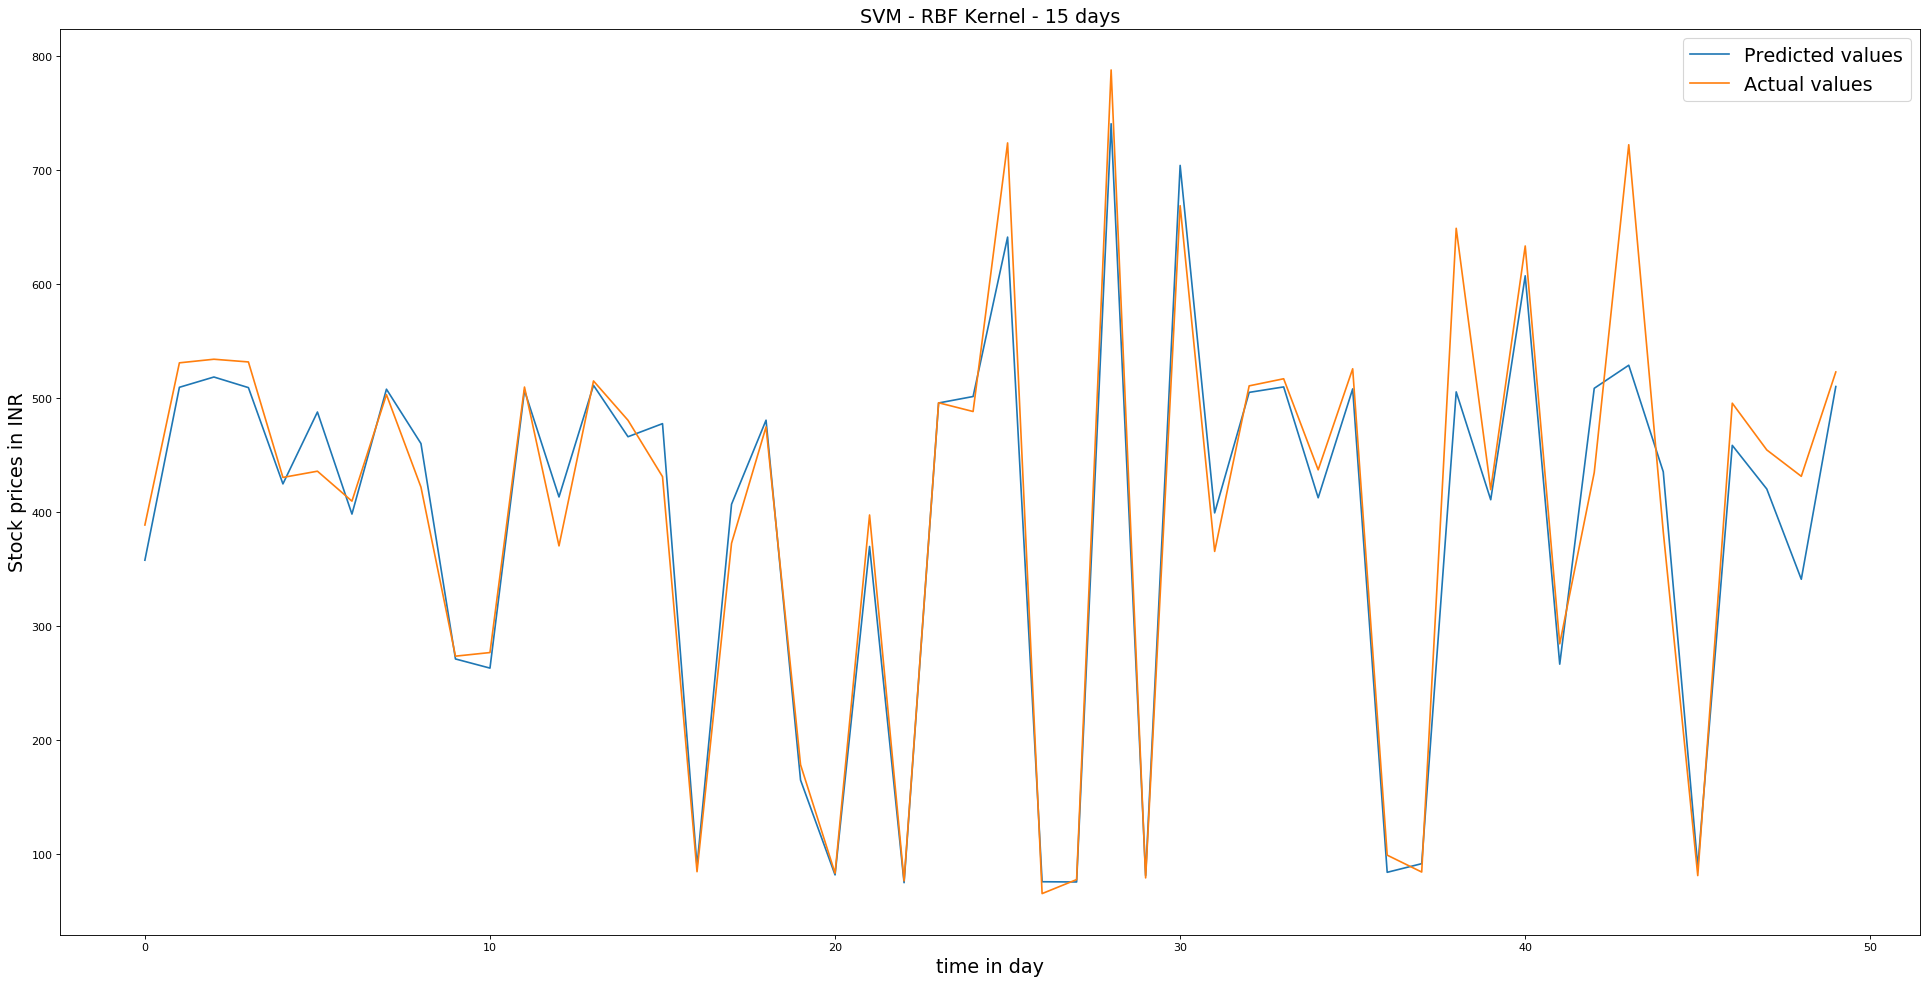

In [138]:
fig=plt.figure(figsize=(30, 15), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(svm_rbf_predict[0:50],label = "Predicted values")
plt.plot(y_test[0:50], label = "Actual values")
plt.xlabel('time in day', fontsize = 'xx-large')
plt.ylabel('Stock prices in INR', fontsize = 'xx-large')
plt.title('SVM - RBF Kernel - 15 days', fontsize = 'xx-large')
plt.legend(fontsize = 'xx-large')
plt.show()

In [139]:
svr_linear = SVR(C=30000, cache_size=200, coef0=0.0, degree=1, epsilon=5, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.1, verbose=False)

svr_linear.fit(X_train, y_train)
svm_linear_predict = svr_linear.predict(X_test)

In [140]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 

mae = mean_absolute_error(svm_linear_predict,y_test)
rmse = mean_squared_error(svm_linear_predict,y_test, squared= False)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(svm_linear_predict,y_test)

print('The mae is {} , rmse is {} and mape is {}.'.format(mae,rmse, mape))

The mae is 33.707738041367804 , rmse is 47.51731222599929 and mape is 8.57901793434619.


In [141]:
confidence = svr_linear.score(X_test, y_test)
print('accuracy:',confidence)
    

accuracy: 0.9120525154162152


In [142]:
from sklearn.metrics import r2_score
accuracy = r2_score(svm_linear_predict, y_test)
print("r2-score:", accuracy)

r2-score: 0.9117174500355562


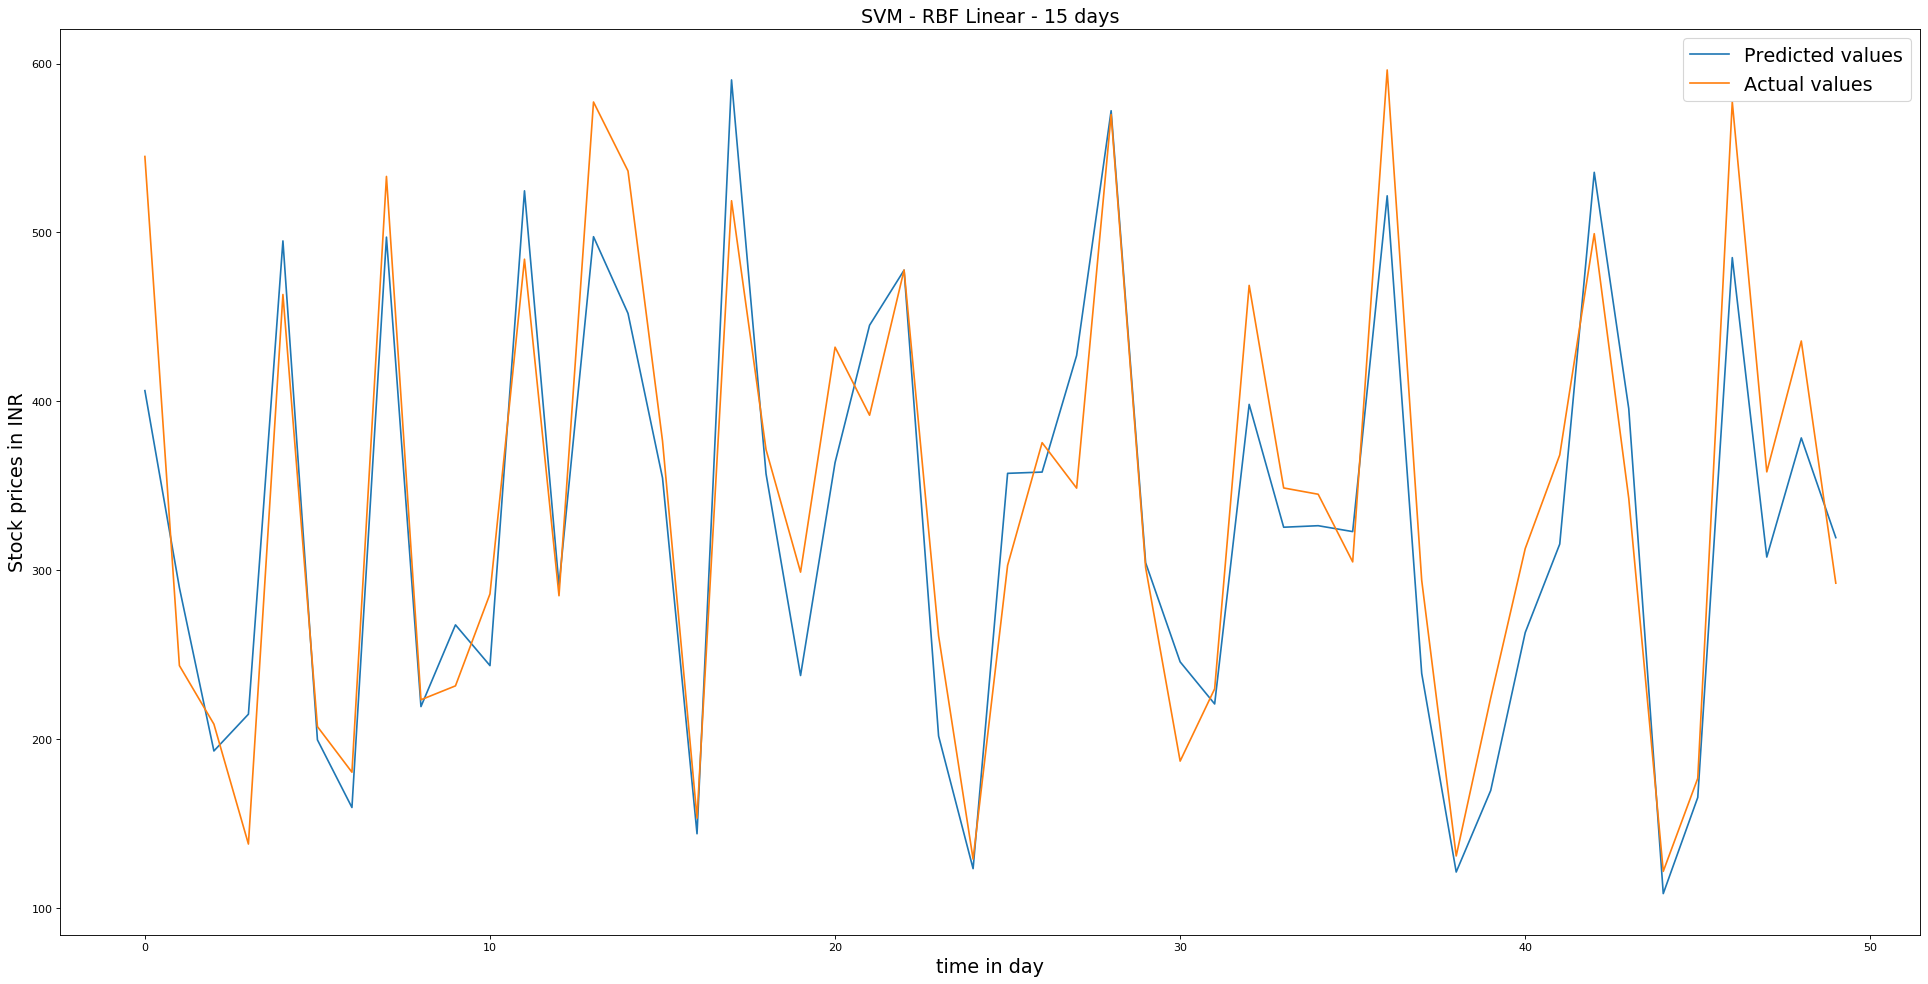

In [66]:
fig=plt.figure(figsize=(30, 15), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(svm_linear_predict[0:50],label = "Predicted values")
plt.plot(y_test[0:50], label = "Actual values")
plt.xlabel('time in day', fontsize = 'xx-large')
plt.ylabel('Stock prices in INR', fontsize = 'xx-large')
plt.title('SVM - RBF Linear - 15 days', fontsize = 'xx-large')
plt.legend(fontsize = 'xx-large')
plt.show()